In [ ]:
from model import RobotMission
import random as rd
import pandas as pd



default_values = {
    "seed": 42,
    "width": 21,
    "height": 12,
    "n_green_robots": 5,
    "n_yellow_robots": 4,
    "n_red_robots": 3,
    "n_green_wastes": 30,
    "n_yellow_wastes": 20,
    "n_red_wastes": 10,
}

model = RobotMission(**default_values)
N_runs = 20


datacollectors = []
for i in range(N_runs):
    
    default_values["seed"] = rd.randint(0,500)
    model = RobotMission(**default_values)
    
    while model._is_waste_present() and model.steps < 1000:
        model.step()
        
    datacollectors.append(model.datacollector.get_model_vars_dataframe())
    


/home/gaetan/projects/sma--2024-2025/robot_mission_9/model.py:36: UserWarning: Default value 0.0 (float) might not be best suitable with dtype=float64.
  radiactivity_layer = PropertyLayer("radioactivity",width,height,default_value=0.)
/home/gaetan/projects/sma--2024-2025/robot_mission_9/model.py:36: FutureWarning: The new PropertyLayer and _PropertyGrid classes experimental. It may be changed or removed in any and all future releases, including patch releases.
We would love to hear what you think about this new feature. If you have any thoughts, share them with us here: https://github.com/projectmesa/mesa/discussions/1932
  radiactivity_layer = PropertyLayer("radioactivity",width,height,default_value=0.)
Agent RedAgent is full and cannot perform normaly, performing random moove.
Agent RedAgent is full and cannot perform normaly, performing random moove.
Agent RedAgent is full and cannot perform normaly, performing random moove.
Agent RedAgent is full and cannot perform normaly, perfor

In [9]:
print("max steps:", max([len(df) for df in datacollectors]))

datacollectors[0].head()

max steps: 301


,green_wastes,yellow_wastes,red_wastes,total_wastes,green_distance,yellow_distance,red_distance,total_distance
0,30,20,10,60,0,0,0,0
1,28,20,10,58,3,4,3,10
2,27,18,10,55,7,6,6,19
3,24,18,10,52,9,10,9,28
4,22,17,10,49,12,13,12,37


In [6]:
for df in datacollectors:
    assert list(df.columns) == list(datacollectors[0].columns), "Les colonnes ne correspondent pas."
    
mean_dataframe = pd.concat(datacollectors).groupby(level=0).mean()
mean_dataframe.to_csv("/home/gaetan/projects/sma--2024-2025/robot_mission_9/data/moyenne-snake-and-memory.csv", index=False)
print("nombre max d'étapes:",len(mean_dataframe))
mean_dataframe.head()

nombre max d'étapes: 301


,green_wastes,yellow_wastes,red_wastes,total_wastes,green_distance,yellow_distance,red_distance,total_distance
0,30.00,20.0,10.00,60.0,0.00,0.00,0.00,0.00
1,27.80,19.3,9.40,56.5,2.80,3.30,2.55,8.65
2,25.45,17.2,8.55,51.2,5.45,5.20,4.70,15.35
3,23.40,16.5,8.00,47.9,8.40,8.50,7.10,24.00
4,21.55,15.4,7.85,44.8,11.15,10.95,9.80,31.90


Text(0.5, 1.0, 'Evolution moyenne des déchetes sur 20 runs pour la stratégie SNAKE+MEMORY')

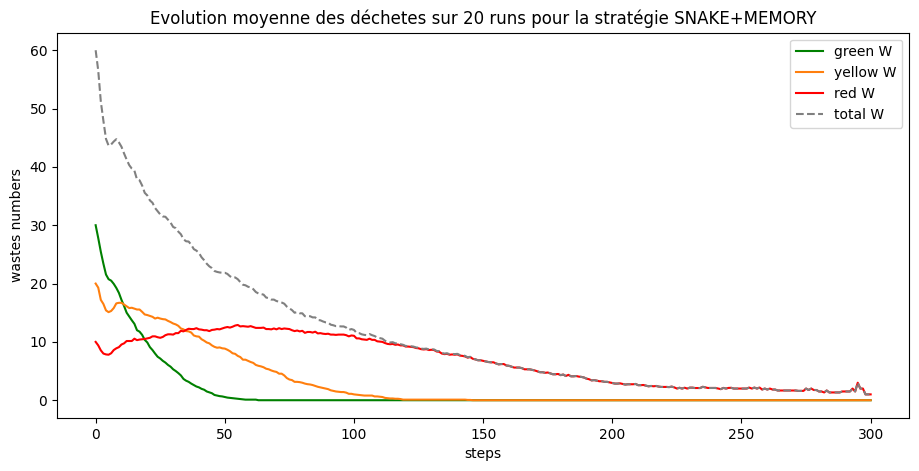

In [4]:
import matplotlib.pyplot as plt

mean_dataframe_cut = mean_dataframe[mean_dataframe.index<=500]

plt.figure( figsize=(11,5))
plt.plot(mean_dataframe_cut["green_wastes"],label="green W",color="green")
plt.plot(mean_dataframe_cut["yellow_wastes"], label="yellow W", color= "tab:orange")
plt.plot(mean_dataframe_cut["red_wastes"],label="red W",color="red")
plt.plot(mean_dataframe_cut["total_wastes"], "--", color="grey",label="total W")
plt.xlabel("steps")
plt.ylabel("wastes numbers")
plt.legend()
plt.title("Evolution moyenne des déchetes sur 20 runs pour la stratégie SNAKE+MEMORY")